# **CONFIGURACION**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from tabulate import tabulate
import nltk
import re
import os
import spacy

# Instalación del modelo de spaCy en caso de que no esté disponible (para Windows)
try:
    spacy.load("es_core_news_sm")
except OSError:
    print("Instalando el modelo 'es_core_news_sm' de spaCy...")
    os.system("python -m spacy download es_core_news_sm")

# Confirmación de la instalación
print("Instalación de spaCy y descarga del modelo 'es_core_news_sm' completada.")

# Ruta del archivo local
file_path = input("Introduce la ruta completa del archivo (por ejemplo, C:\\\\ruta\\\\archivo.xlsx): ")

# Verificar la existencia del archivo
if os.path.exists(file_path):
    print(f"Archivo encontrado: {file_path}")
else:
    raise FileNotFoundError(f"El archivo no se encuentra en la ruta especificada: {file_path}")

# Cargar los datos desde el archivo
try:
    df = pd.read_excel(file_path)
    print("Archivo cargado correctamente.")
except Exception as e:
    raise ValueError(f"Error al cargar el archivo: {e}")

# Mostrar las primeras filas de la tabla
print("Primeras filas del archivo:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))


Instalación de spaCy y descarga del modelo 'es_core_news_sm' completada.


FileNotFoundError: El archivo no se encuentra en la ruta especificada: 

EDA


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

# Dimensiones del dataset
print("Dimensiones del dataset:")
print(df.shape)

# Primeras filas
print("\nPrimeras filas del dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

# Últimas filas
print("\nÚltimas filas del dataset:")
print(tabulate(df.tail(), headers='keys', tablefmt='psql'))



Dimensiones del dataset:
(885, 3)

Primeras filas del dataset:
+----+-------------+-------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Tipos de datos


In [3]:
# Tipos de datos en cada columna
print("\n--- Tipos de datos ---")
print(df.dtypes)



--- Tipos de datos ---
folder      object
filename    object
segments    object
dtype: object


Estadisticas Descriptivas

In [4]:
# Estadísticas descriptivas
print("\n--- Resumen estadístico ---")
print(df.describe(include='all').transpose())



--- Resumen estadístico ---
         count unique                                                top freq
folder     885     11                            2023-07-08a-2023-08-10a  226
filename   885    885  021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401T...    1
segments   872    872  [ConversationSegment(speaker_id='Speaker 0', t...    1


Valores nulos

In [5]:
# Conteo de valores nulos por columna
print("\n--- Valores nulos ---")
print(df.isnull().sum())

# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)



--- Valores nulos ---
folder       0
filename     0
segments    13
dtype: int64

Porcentaje de valores nulos por columna:
folder      0.000000
filename    0.000000
segments    1.468927
dtype: float64


Duplicados

In [6]:
# Conteo de registros duplicados
print("\n--- Valores duplicados ---")
print(f"Registros duplicados: {df.duplicated().sum()}")



--- Valores duplicados ---
Registros duplicados: 0


In [7]:
# Eliminar registros con valores nulos en la columna 'segments'
df = df.dropna(subset=['segments']).reset_index(drop=True)

# Verificar que se han eliminado los nulos
print("Registros después de eliminar nulos:")
print(df.shape)  # Imprime las nuevas dimensiones del DataFrame


Registros después de eliminar nulos:
(872, 3)


In [8]:
df.describe()

,folder,filename,segments
count,872,872,872
unique,11,872,872
top,2023-07-08a-2023-08-10a,021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
freq,222,1,1


TRANSFORMACION DE LA DATA


In [9]:
# Verificar el contenido de 'segments' después de la conversión
print("Contenido de la columna 'segments':")
print(df['segments'].head(10))


Contenido de la columna 'segments':
0    [ConversationSegment(speaker_id='Speaker 0', t...
1    [ConversationSegment(speaker_id='Speaker 0', t...
2    [ConversationSegment(speaker_id='Speaker 0', t...
3    [ConversationSegment(speaker_id='Speaker 0', t...
4    [ConversationSegment(speaker_id='Speaker 0', t...
5    [ConversationSegment(speaker_id='Speaker 0', t...
6    [ConversationSegment(speaker_id='Speaker 0', t...
7    [ConversationSegment(speaker_id='Speaker 0', t...
8    [ConversationSegment(speaker_id='Speaker 0', t...
9    [ConversationSegment(speaker_id='Speaker 0', t...
Name: segments, dtype: object


In [10]:
df.head(10)

,folder,filename,segments
0,2023-04-01a,021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
1,2023-04-01a,026ae835-07af-4cd1-a746-26de91ccfb84_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
2,2023-04-01a,047db9ca-b2af-4229-b2aa-d38f22eb3652_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
3,2023-04-01a,0c1dacc2-0d21-474f-9f30-0b2bc3069d1a_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
4,2023-04-01a,0f9f909b-b478-4bd1-ae7a-8656ebc39e50_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
5,2023-04-01a,139f333f-8a01-4e37-a64b-91a6170c4523_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
6,2023-04-01a,15407ae0-a923-46ee-adb2-f5410cefe223_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
7,2023-04-01a,16d944ae-54bb-461a-81bd-e1bedc5aa4c9_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
8,2023-04-01a,1d3fb2e9-3a05-451e-9eb6-c0d915472694_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."
9,2023-04-01a,1e798210-746b-4b36-9a8f-e460af2cf9f9_20230401T...,"[ConversationSegment(speaker_id='Speaker 0', t..."


In [11]:
# Filtrar las filas donde 'segments' tiene listas válidas
valid_segments = df[df['segments'].apply(lambda x: isinstance(x, list))]
print(f"Número de registros válidos en 'segments': {len(valid_segments)}")


Número de registros válidos en 'segments': 0


In [ ]:
import pandas as pd
import re
from tabulate import tabulate

# Crear una copia del DataFrame original
df_copy = df.copy()

# Filtrar filas donde 'segments' no sea nulo y sea un string
df_copy = df_copy[df_copy['segments'].notnull()]  # Eliminar valores nulos
df_copy = df_copy[df_copy['segments'].apply(lambda x: isinstance(x, str))]  # Filtrar solo strings

# Función para procesar manualmente cada segmento (sin sentiment)
def extract_segments_without_sentiment(segment_str):
    try:
        # Expresión regular para extraer 'speaker_id' y 'text'
        pattern = r"speaker_id='(.*?)', text='(.*?)'"
        matches = re.findall(pattern, segment_str)
        return [{"Speaker": match[0], "Text": match[1]} for match in matches]
    except Exception as e:
        print(f"Error procesando segmento: {e}")
        return []

# Aplicar la función a la columna 'segments'
df_copy['Parsed_Segments'] = df_copy['segments'].apply(extract_segments_without_sentiment)

# Crear un nuevo DataFrame con los datos desglosados e incluir folder y filename
rows = []
for _, row in df_copy.iterrows():
    for segment in row['Parsed_Segments']:
        segment['Folder'] = row['folder']
        segment['Filename'] = row['filename']
        rows.append(segment)

# Crear un nuevo DataFrame a partir de los resultados
conversation_df = pd.DataFrame(rows)

# Guardar el nuevo DataFrame en el directorio actual
conversation_df.to_csv('conversation_segments.csv', index=False)

# Resumen por filename: cantidad de filas (turnos) por archivo
filename_summary = conversation_df.groupby('Filename').size().reset_index(name='Turnos')

# Ordenar los resultados por la cantidad de turnos
filename_summary = filename_summary.sort_values(by='Turnos', ascending=False)

# Guardar el resumen en un archivo CSV
filename_summary.to_csv('filename_summary.csv', index=False)

# Mostrar el resumen en formato tabular legible
print("\nResumen de turnos por archivo (ordenado):")
print(tabulate(filename_summary.head(10), headers='keys', tablefmt='pretty'))  # Mostrar solo los primeros 10



Resumen de turnos por archivo (ordenado):
+-----+-------------------------------------------------------------+--------+
|     |                          Filename                           | Turnos |
+-----+-------------------------------------------------------------+--------+
| 764 | e24a2db7-255e-4480-a02f-3ae1a5dcab3c_20230410T20_36_UTC.txt |  134   |
| 19  | 04cce189-8ff0-4de9-86ff-978ceed8b3c9_20230410T21_47_UTC.txt |  110   |
| 223 | 43ae5242-9b5d-4abb-bf63-d04a3bf44b85_20230410T21_25_UTC.txt |  106   |
| 390 |   73413f991767446fae4d8a1c2e9a4753_20230411t14_29_utc.txt   |   88   |
| 133 |   2a66fed04e2041a59bcc3ac6d68949ea_20230411t15_37_utc.txt   |   73   |
| 462 | 87cee38a-8a48-4c62-890a-2b8a04881c3c_20230410T21_11_UTC.txt |   67   |
| 818 |   f1e80f376a024fac8912df9b9df04df0_20230610t13_44_utc.txt   |   65   |
| 309 |   5e97f67f436a450fa1709f80f8429d93_20230708t14_56_utc.txt   |   62   |
| 793 |   eb5647039c2b4e91af9e438a908ef4fc_20230520t16_04_utc.txt   |   61   |
| 732 |  

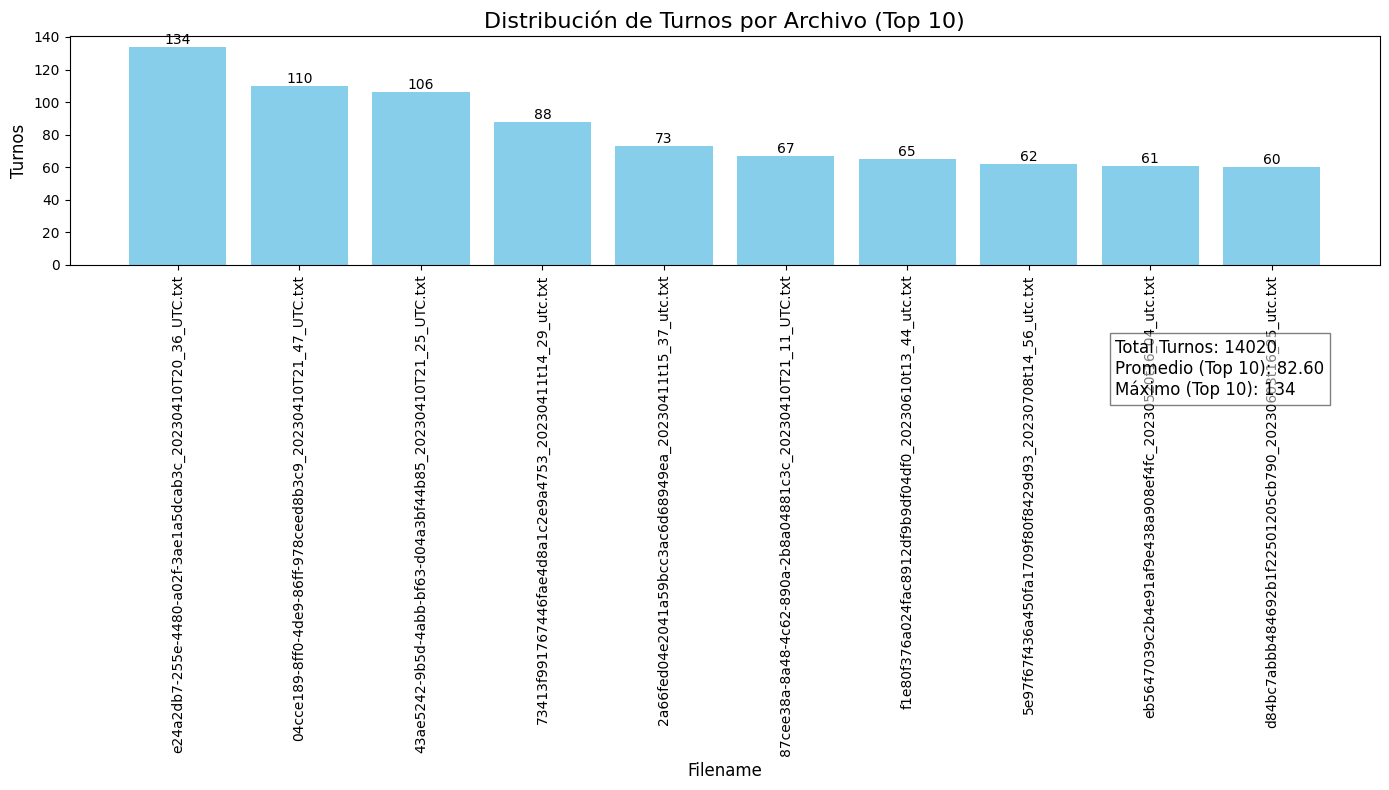

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(
    filename_summary['Filename'][:10],
    filename_summary['Turnos'][:10],
    color='skyblue'
)

# Título y etiquetas de los ejes
plt.title('Distribución de Turnos por Archivo (Top 10)', fontsize=16)
plt.xlabel('Filename', fontsize=12)
plt.ylabel('Turnos', fontsize=12)
plt.xticks(rotation=90, fontsize=10)

# Añadir etiquetas de datos encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Añadir estadísticas como leyenda
total_turnos = filename_summary['Turnos'].sum()
promedio_turnos = filename_summary['Turnos'][:10].mean()
max_turnos = filename_summary['Turnos'][:10].max()

# Crear un texto de leyenda
stats_text = (
    f'Total Turnos: {total_turnos}\n'
    f'Promedio (Top 10): {promedio_turnos:.2f}\n'
    f'Máximo (Top 10): {max_turnos}'
)
plt.gcf().text(0.8, 0.5, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# **Distribución de turnos por archivo:**


In [14]:
import pandas as pd
from tabulate import tabulate

# Calcular la longitud del texto en la columna 'Text'
conversation_df['Text_Length'] = conversation_df['Text'].apply(len)

# Calcular la longitud promedio del texto por cada Speaker
avg_length_by_speaker = conversation_df.groupby('Speaker')['Text_Length'].mean().reset_index()

# Mostrar los resultados en formato tabular
print("\nLongitud promedio de texto por Speaker:")
print(tabulate(avg_length_by_speaker, headers='keys', tablefmt='pretty'))



Longitud promedio de texto por Speaker:
+---+---------------+--------------------+
|   |    Speaker    |    Text_Length     |
+---+---------------+--------------------+
| 0 | Description14 |       191.0        |
| 1 |   Speaker 0   | 141.03770172509738 |
| 2 |   Speaker 1   | 62.198551153163805 |
| 3 |   Speaker 2   | 71.40298507462687  |
+---+---------------+--------------------+


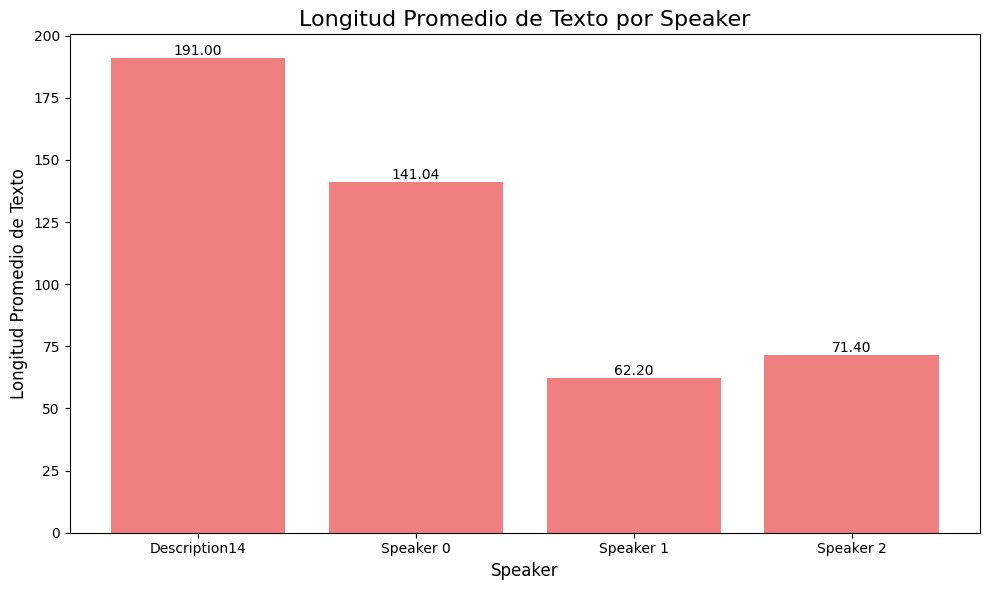

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(
    avg_length_by_speaker['Speaker'],
    avg_length_by_speaker['Text_Length'],
    color='lightcoral'
)

# Título y etiquetas
plt.title('Longitud Promedio de Texto por Speaker', fontsize=16)
plt.xlabel('Speaker', fontsize=12)
plt.ylabel('Longitud Promedio de Texto', fontsize=12)

# Añadir etiquetas de datos encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# **PREPROCESAMIENTO**

In [ ]:
import os
import requests
import zipfile

# Ruta esperada para guardar el recurso (adaptada para el entorno actual)
nltk_data_path = os.path.join(os.getcwd(), "nltk_data/corpora/")
stopwords_url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip"
local_zip_path = os.path.join(os.getcwd(), "stopwords.zip")

# Crear directorio si no existe
os.makedirs(nltk_data_path, exist_ok=True)

# Descargar el recurso stopwords.zip
print("Descargando stopwords.zip...")
response = requests.get(stopwords_url)
with open(local_zip_path, "wb") as file:
    file.write(response.content)

# Extraer el contenido del ZIP
print("Extrayendo stopwords.zip...")
with zipfile.ZipFile(local_zip_path, "r") as zip_ref:
    zip_ref.extractall(nltk_data_path)

# Verificar contenido
if os.path.exists(os.path.join(nltk_data_path, "stopwords")):
    print("Recurso 'stopwords' descargado y extraído correctamente en:", nltk_data_path)
else:
    print("Error: El recurso 'stopwords' no se encuentra en la ruta esperada.")

# Opcional: Eliminar el archivo ZIP después de la extracción
os.remove(local_zip_path)


Descargando stopwords.zip...
Extrayendo stopwords.zip...
Recurso 'stopwords' descargado y extraído correctamente en: c:\Users\jartp\Desktop\nltk_data/corpora/


In [17]:
from nltk.corpus import stopwords
import nltk

# Agregar la ruta local de NLTK
nltk.data.path.append("c:/Users/jartp/Desktop/Pipeline_ProcessSentiment/nltk_data")

# Cargar palabras de parada en español
stop_words = stopwords.words('spanish')

# Mostrar las primeras palabras de parada
print(f"Palabras de parada en español: {stop_words[:10]}")


Palabras de parada en español: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


# **LIMPIEZA DE DATOS**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import pandas as pd

# Inicializar herramientas de NLP
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('spanish'))

# Función de preprocesamiento general
def preprocess_text(text, remove_stopwords=False, use_lemmatization=False, use_stemming=False):
    # Normalización básica: quitar caracteres especiales y convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()

    # Tokenización (dividir en palabras)
    tokens = text.split()

    # Opcional: Eliminar stopwords
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]

    # Opcional: Lematización
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Opcional: Stemming
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]

    # Unir tokens nuevamente en un texto
    return ' '.join(tokens)

# Crear una nueva variable para almacenar las columnas procesadas
conversation_preprocessed_df = conversation_df.copy()

# Calcular longitud del texto original
conversation_preprocessed_df['Text_Length'] = conversation_preprocessed_df['Text'].apply(len)

# Aplicar los enfoques de preprocesamiento
conversation_preprocessed_df['Normalized_Text'] = conversation_preprocessed_df['Text'].apply(preprocess_text)
conversation_preprocessed_df['Lemmatized_Text'] = conversation_preprocessed_df['Text'].apply(
    lambda x: preprocess_text(x, use_lemmatization=True)
)
conversation_preprocessed_df['Stemmed_Text'] = conversation_preprocessed_df['Text'].apply(
    lambda x: preprocess_text(x, use_stemming=True)
)
conversation_preprocessed_df['Stopword_Removed_Text'] = conversation_preprocessed_df['Text'].apply(
    lambda x: preprocess_text(x, remove_stopwords=True)
)
conversation_preprocessed_df['Stopword_Removed_Lemmatized_Text'] = conversation_preprocessed_df['Text'].apply(
    lambda x: preprocess_text(x, remove_stopwords=True, use_lemmatization=True)
)
conversation_preprocessed_df['Stopword_Removed_Stemmed_Text'] = conversation_preprocessed_df['Text'].apply(
    lambda x: preprocess_text(x, remove_stopwords=True, use_stemming=True)
)

# Calcular longitudes para cada enfoque
conversation_preprocessed_df['Normalized_Text_Length'] = conversation_preprocessed_df['Normalized_Text'].apply(len)
conversation_preprocessed_df['Lemmatized_Text_Length'] = conversation_preprocessed_df['Lemmatized_Text'].apply(len)
conversation_preprocessed_df['Stemmed_Text_Length'] = conversation_preprocessed_df['Stemmed_Text'].apply(len)
conversation_preprocessed_df['Stopword_Removed_Text_Length'] = conversation_preprocessed_df['Stopword_Removed_Text'].apply(len)
conversation_preprocessed_df['Stopword_Removed_Lemmatized_Text_Length'] = conversation_preprocessed_df['Stopword_Removed_Lemmatized_Text'].apply(len)
conversation_preprocessed_df['Stopword_Removed_Stemmed_Text_Length'] = conversation_preprocessed_df['Stopword_Removed_Stemmed_Text'].apply(len)

# Reordenar columnas según la estructura solicitada
column_order = [
    'Folder', 'Filename', 'Speaker', 'Text', 'Text_Length',
    'Normalized_Text', 'Lemmatized_Text', 'Stemmed_Text',
    'Stopword_Removed_Text', 'Stopword_Removed_Lemmatized_Text', 'Stopword_Removed_Stemmed_Text',
    'Normalized_Text_Length', 'Lemmatized_Text_Length', 'Stemmed_Text_Length',
    'Stopword_Removed_Text_Length', 'Stopword_Removed_Lemmatized_Text_Length',
    'Stopword_Removed_Stemmed_Text_Length'
]
conversation_preprocessed_df = conversation_preprocessed_df[column_order]

# Guardar el DataFrame como archivo XLSX
output_path = "preprocessed_texts.xlsx"
conversation_preprocessed_df.to_excel(output_path, index=False)
print(f"Archivo guardado correctamente en: {output_path}")


Archivo guardado correctamente en: preprocessed_texts.xlsx


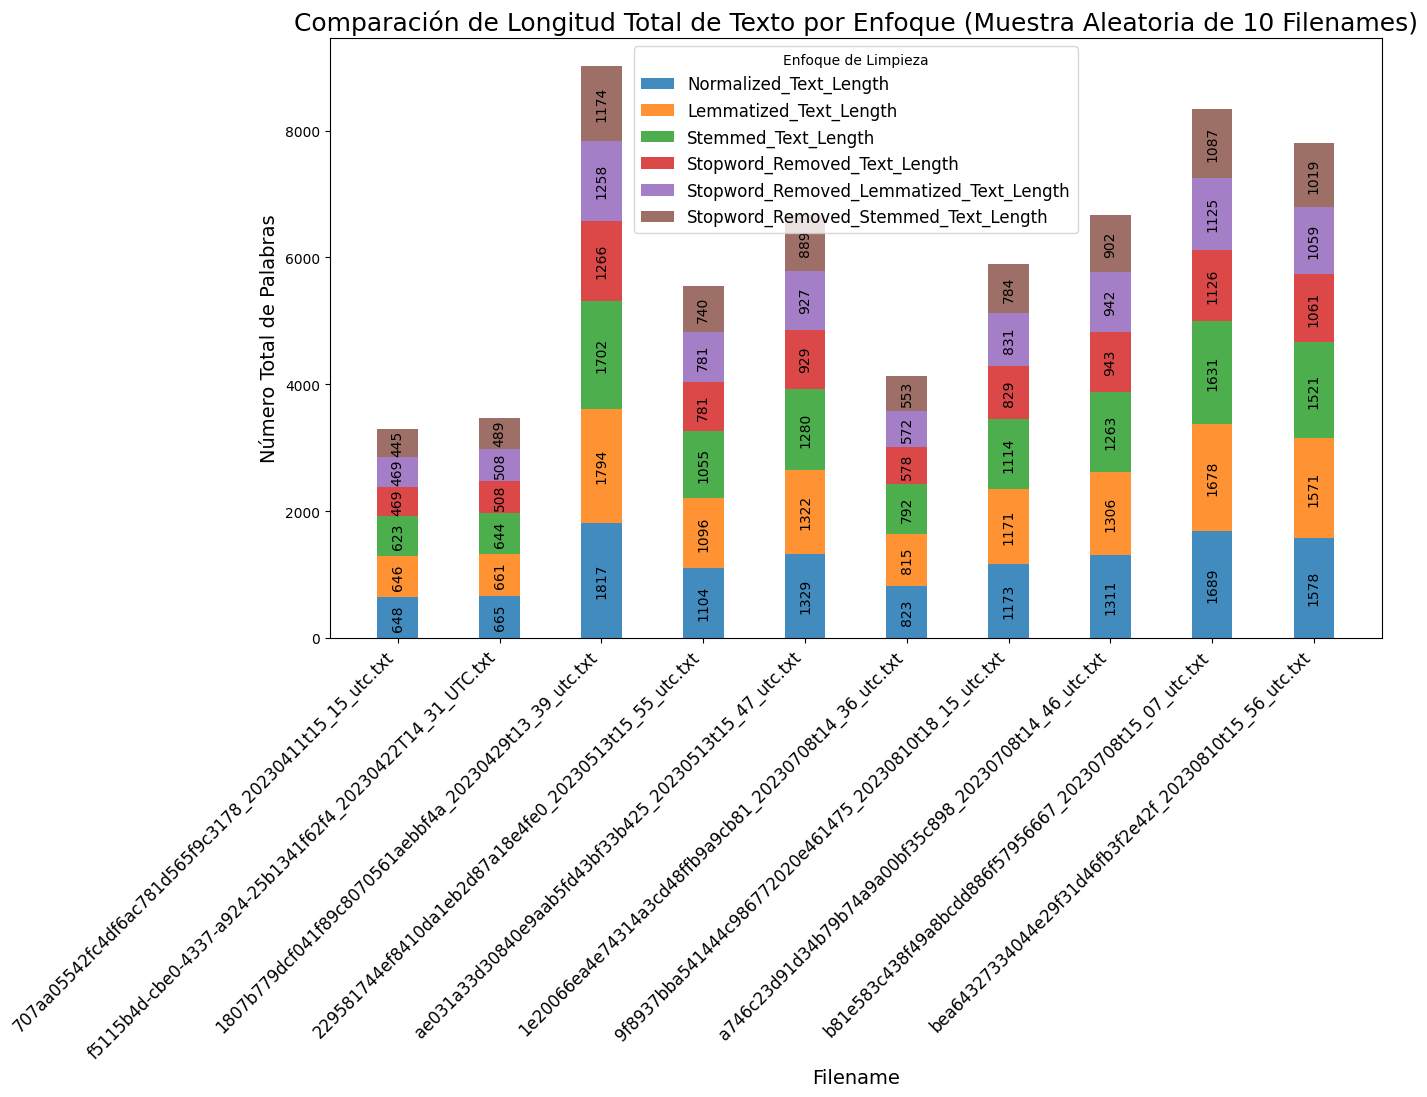

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Verificar si conversation_preprocessed_df está definido
try:
    conversation_preprocessed_df
except NameError:
    raise ValueError("El DataFrame 'conversation_preprocessed_df' no está definido. Asegúrate de haberlo cargado correctamente.")

# Crear una copia del dataset original para trabajar
working_data = conversation_preprocessed_df.copy()

# Verificar columnas necesarias
required_columns = [
    'Normalized_Text_Length', 'Lemmatized_Text_Length', 'Stemmed_Text_Length',
    'Stopword_Removed_Text_Length', 'Stopword_Removed_Lemmatized_Text_Length',
    'Stopword_Removed_Stemmed_Text_Length', 'Filename'
]
missing_columns = [col for col in required_columns if col not in working_data.columns]
if missing_columns:
    raise ValueError(f"Faltan las siguientes columnas en working_data: {missing_columns}")

# Seleccionar aleatoriamente 10 filenames únicos
random_filenames = working_data['Filename'].drop_duplicates().sample(10, random_state=42).values

# Filtrar datos solo para los filenames seleccionados
filtered_data = working_data[working_data['Filename'].isin(random_filenames)]

# Calcular los métodos de limpieza y etiquetas de filenames
cleaning_methods = [
    'Normalized_Text_Length', 'Lemmatized_Text_Length', 'Stemmed_Text_Length',
    'Stopword_Removed_Text_Length', 'Stopword_Removed_Lemmatized_Text_Length',
    'Stopword_Removed_Stemmed_Text_Length'
]
labels = filtered_data['Filename'].unique()  # Etiquetas del eje X (filenames únicos seleccionados)
data = [
    filtered_data.groupby('Filename')[method].sum().values for method in cleaning_methods
]
x = np.arange(len(labels))  # Posiciones para las barras

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 10))  # Aumentar el tamaño del gráfico
bottom = np.zeros(len(labels))  # Inicializar las alturas de la base de las barras

# Agregar cada segmento (enfoque de limpieza) a las barras apiladas
for i, method in enumerate(cleaning_methods):
    bars = ax.bar(x, data[i], width=0.4, label=method, bottom=bottom, alpha=0.85)
    # Agregar etiquetas encima de las barras
    for bar, val in zip(bars, data[i]):
        if val > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{val:.0f}', ha='center', va='center', fontsize=10, rotation=90
            )
    bottom += data[i]  # Acumular las alturas de las barras

# Configuración del gráfico
ax.set_title('Comparación de Longitud Total de Texto por Enfoque (Muestra Aleatoria de 10 Filenames)', fontsize=18)
ax.set_xlabel('Filename', fontsize=14)
ax.set_ylabel('Número Total de Palabras', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
ax.legend(title='Enfoque de Limpieza', fontsize=12)
plt.tight_layout()

# Ajustar márgenes para mejorar la visibilidad
plt.subplots_adjust(top=0.9, bottom=0.3)

# Mostrar gráfico
plt.show()


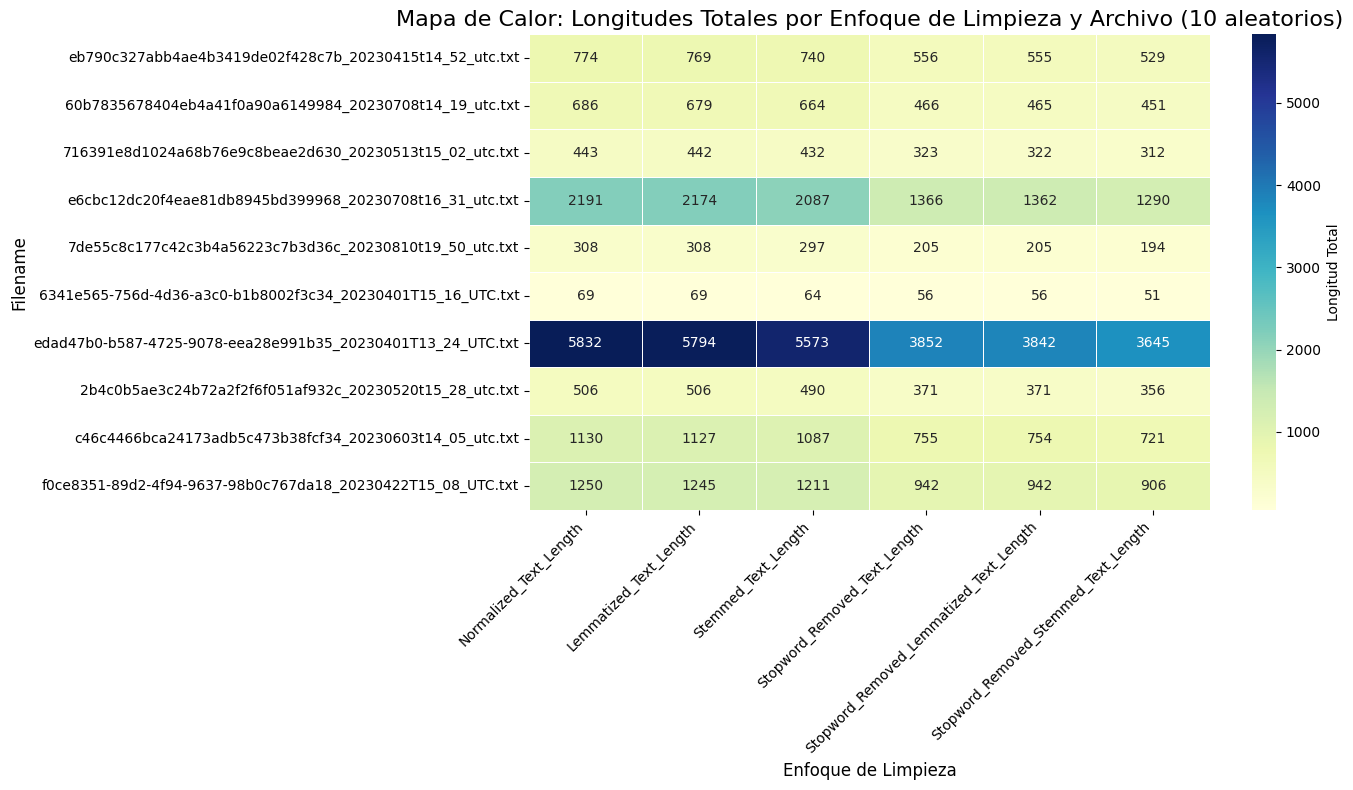

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del dataset original para trabajar
working_data = conversation_preprocessed_df.copy()

# Verificar columnas necesarias
required_columns = [
    'Filename', 'Normalized_Text_Length', 'Lemmatized_Text_Length',
    'Stemmed_Text_Length', 'Stopword_Removed_Text_Length',
    'Stopword_Removed_Lemmatized_Text_Length', 'Stopword_Removed_Stemmed_Text_Length'
]
missing_columns = [col for col in required_columns if col not in working_data.columns]
if missing_columns:
    raise ValueError(f"Faltan las siguientes columnas en working_data: {missing_columns}")

# Agrupar los datos para el mapa de calor
heatmap_data = working_data.groupby('Filename').sum(numeric_only=True).reset_index()
heatmap_data = heatmap_data[
    ['Filename', 'Normalized_Text_Length', 'Lemmatized_Text_Length',
     'Stemmed_Text_Length', 'Stopword_Removed_Text_Length',
     'Stopword_Removed_Lemmatized_Text_Length', 'Stopword_Removed_Stemmed_Text_Length']
]

# Seleccionar 10 filenames aleatorios
heatmap_data = heatmap_data.sample(10, random_state=42)

# Ajustar el índice
heatmap_data.set_index('Filename', inplace=True)

# Crear el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Longitud Total'}
)
plt.title("Mapa de Calor: Longitudes Totales por Enfoque de Limpieza y Archivo (10 aleatorios)", fontsize=16)
plt.xlabel("Enfoque de Limpieza", fontsize=12)
plt.ylabel("Filename", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


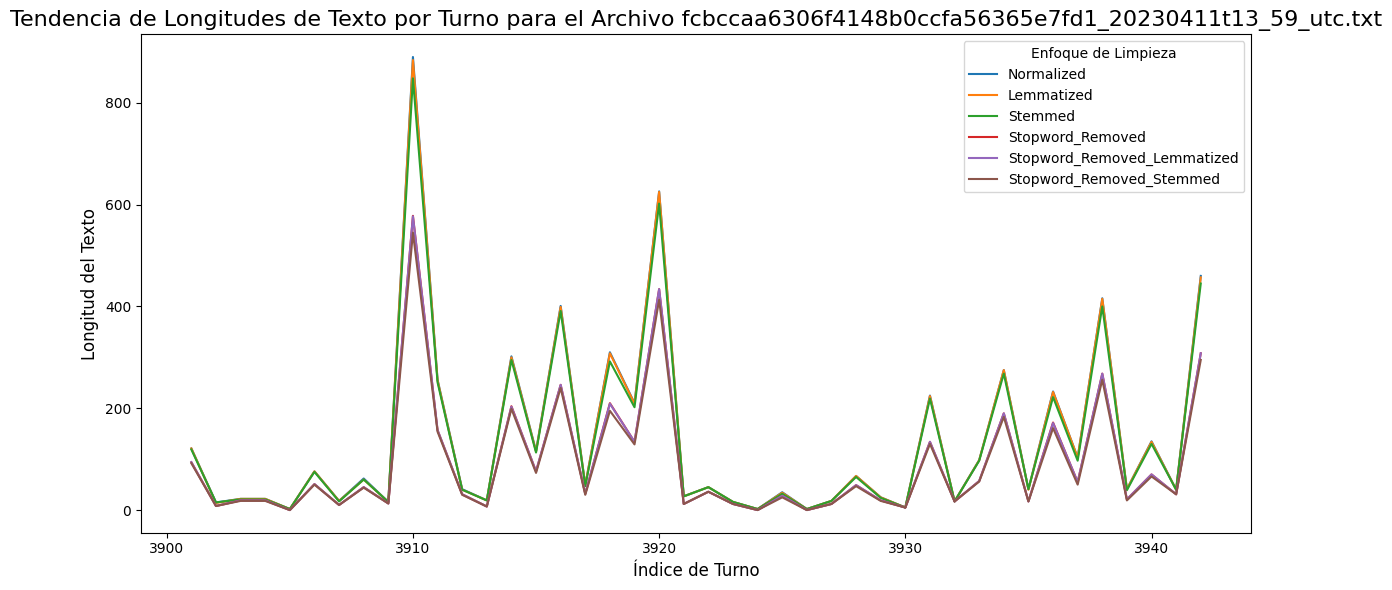

In [ ]:
import matplotlib.pyplot as plt

# Crear una copia del dataset original para trabajar
working_data = conversation_preprocessed_df.copy()

# Verificar columnas necesarias
required_columns = [
    'Filename', 'Normalized_Text_Length', 'Lemmatized_Text_Length',
    'Stemmed_Text_Length', 'Stopword_Removed_Text_Length',
    'Stopword_Removed_Lemmatized_Text_Length', 'Stopword_Removed_Stemmed_Text_Length'
]
missing_columns = [col for col in required_columns if col not in working_data.columns]
if missing_columns:
    raise ValueError(f"Faltan las siguientes columnas en working_data: {missing_columns}")

# Seleccionar un archivo aleatorio
selected_filename = working_data['Filename'].sample(1, random_state=42).values[0]
filename_data = working_data[working_data['Filename'] == selected_filename]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(filename_data.index, filename_data['Normalized_Text_Length'], label='Normalized')
plt.plot(filename_data.index, filename_data['Lemmatized_Text_Length'], label='Lemmatized')
plt.plot(filename_data.index, filename_data['Stemmed_Text_Length'], label='Stemmed')
plt.plot(filename_data.index, filename_data['Stopword_Removed_Text_Length'], label='Stopword_Removed')
plt.plot(filename_data.index, filename_data['Stopword_Removed_Lemmatized_Text_Length'], label='Stopword_Removed_Lemmatized')
plt.plot(filename_data.index, filename_data['Stopword_Removed_Stemmed_Text_Length'], label='Stopword_Removed_Stemmed')

# Configuración del gráfico
plt.title(f"Tendencia de Longitudes de Texto por Turno para el Archivo {selected_filename}", fontsize=16)
plt.xlabel("Índice de Turno", fontsize=12)
plt.ylabel("Longitud del Texto", fontsize=12)
plt.legend(title="Enfoque de Limpieza", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# **CARGUE MUESTREO ETIQUETADO**


In [22]:
import pandas as pd
from tabulate import tabulate

# Ruta al archivo etiquetado (ajústala según tu ubicación actual)
label_file = r"C:\Users\jartp\Desktop\Pipeline_ProcessSentiment\labeled_100_filenames.xlsx"

# Cargar el archivo con etiquetas
labels_df = pd.read_excel(label_file)

# Mostrar las primeras filas del archivo de etiquetas en formato tabular
print("Archivo de etiquetas cargado:")
print(tabulate(labels_df.head(), headers='keys', tablefmt='pretty'))


Archivo de etiquetas cargado:
+---+-------------------------+---------------------------------------------------------+--------------------+
|   |         Folder          |                        FileName                         | ANÁLISIS_FINAL_AJD |
+---+-------------------------+---------------------------------------------------------+--------------------+
| 0 | 2023-07-08a-2023-08-10a | bea64327334044e29f31d46fb3f2e42f_20230810t15_56_utc.txt |      Positivo      |
| 1 | 2023-07-08a-2023-08-10a | 62ef1875d43648999789f49be5e0dec0_20230708t16_48_utc.txt |      Neutral       |
| 2 |       2023-04-11a       | 3bc7f3e6dbe0419fa30eacb2504c3a9b_20230411t23_02_utc.txt |      Neutral       |
| 3 | 2023-07-08a-2023-08-10a | e4b2251c3af045018230986f0720bd68_20230810t16_05_utc.txt |      Neutral       |
| 4 |        4/15/2023        | 64ae78283bcc45ba82db806c021a44e7_20230415t14_13_utc.txt |      Neutral       |
+---+-------------------------+---------------------------------------------------

#MERGE

In [ ]:
import pandas as pd

# Limpieza de columnas para asegurar consistencia en el merge
labels_df['FileName'] = labels_df['FileName'].str.strip().str.lower()
conversation_preprocessed_df['Filename'] = conversation_preprocessed_df['Filename'].str.strip().str.lower()

# Realizar el merge
merged_df = pd.merge(
    conversation_preprocessed_df,
    labels_df[['FileName', 'ANÁLISIS_FINAL_AJD']],  # Solo las columnas necesarias de labels_df
    how='left',
    left_on='Filename',
    right_on='FileName'
)

# Eliminar la columna 'FileName' después del merge
merged_df = merged_df.drop(columns=['FileName'], errors='ignore')

# Guardar el dataset combinado en formato XLSX
output_file = "processed_with_labels.xlsx"
merged_df.to_excel(output_file, index=False)
print(f"Dataset combinado guardado en: {output_file}")

# Opcional: Verificar las primeras filas del resultado
print("Datos después del merge:")
print(merged_df.head())


Dataset combinado guardado en: processed_with_labels.xlsx
Datos después del merge:
        Folder                                           Filename    Speaker  \
0  2023-04-01a  021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401t...  Speaker 0   
1  2023-04-01a  021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401t...  Speaker 1   
2  2023-04-01a  021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401t...  Speaker 0   
3  2023-04-01a  021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401t...  Speaker 1   
4  2023-04-01a  021a52a7-0fdf-4b70-aae9-30fea38d8b2d_20230401t...  Speaker 0   

                                                Text  Text_Length  \
0  Hola, buen día.  ¿Me comunico con Laura?  Sí. ...          127   
1                                              Bien.            5   
2  Me alegra mucho.  Laura, el motivo de mi llama...          229   
3  No, la verdad, pues no, muchas gracias por con...          169   
4  Ah, ok, Laura, ¿estarías interesada en algún p...           88   

                     

# **PREPARACION DE BERT**

Si falla el entrenamiento volver a aplicar el siguiente bloque de codigo para la variable labeled_data 

In [ ]:
# Crear una copia del merged_df para trabajar con el modelo de clasificación
classification_df = merged_df.copy()

# Filtrar las filas con etiquetas (datos etiquetados)
labeled_data = classification_df[classification_df['ANÁLISIS_FINAL_AJD'].notna()]

# Verificar cuántos registros etiquetados hay
print(f"Cantidad de registros etiquetados: {labeled_data.shape[0]}")

# Mostrar algunos ejemplos de los datos etiquetados
print("Ejemplos de registros etiquetados:")
print(labeled_data[['Filename', 'Normalized_Text', 'ANÁLISIS_FINAL_AJD']].head())


Cantidad de registros etiquetados: 1374
Ejemplos de registros etiquetados:
                                             Filename  \
23  047db9ca-b2af-4229-b2aa-d38f22eb3652_20230401t...   
24  047db9ca-b2af-4229-b2aa-d38f22eb3652_20230401t...   
25  047db9ca-b2af-4229-b2aa-d38f22eb3652_20230401t...   
26  047db9ca-b2af-4229-b2aa-d38f22eb3652_20230401t...   
27  047db9ca-b2af-4229-b2aa-d38f22eb3652_20230401t...   

                                      Normalized_Text ANÁLISIS_FINAL_AJD  
23                                                aló            Neutral  
24               buenos días por favor la joven sofía            Neutral  
25                                  de parte de quién            Neutral  
26  mucho gusto mi nombre es valentina cerna me es...            Neutral  
27                                        sí señorita            Neutral  


In [25]:
# Verificar el tipo de datos de las columnas clave
print("Tipos de datos antes de la validación:")
print(labeled_data.dtypes)

# Validar y convertir la columna 'Normalized_Text' a string
if not pd.api.types.is_string_dtype(labeled_data['Normalized_Text']):
    labeled_data['Normalized_Text'] = labeled_data['Normalized_Text'].astype(str)
    print("Columna 'Normalized_Text' convertida a string.")

# Validar y convertir la columna 'ANÁLISIS_FINAL_AJD' a string
if not pd.api.types.is_string_dtype(labeled_data['ANÁLISIS_FINAL_AJD']):
    labeled_data['ANÁLISIS_FINAL_AJD'] = labeled_data['ANÁLISIS_FINAL_AJD'].astype(str)
    print("Columna 'ANÁLISIS_FINAL_AJD' convertida a string.")

# Confirmar los tipos de datos después de las conversiones
print("Tipos de datos después de la validación:")
print(labeled_data.dtypes)

# Verificar valores nulos en las columnas clave
missing_texts = labeled_data['Normalized_Text'].isnull().sum()
missing_labels = labeled_data['ANÁLISIS_FINAL_AJD'].isnull().sum()

print(f"Valores nulos en 'Normalized_Text': {missing_texts}")
print(f"Valores nulos en 'ANÁLISIS_FINAL_AJD': {missing_labels}")

# Eliminar filas con valores nulos en las columnas clave si es necesario
if missing_texts > 0 or missing_labels > 0:
    labeled_data = labeled_data.dropna(subset=['Normalized_Text', 'ANÁLISIS_FINAL_AJD'])
    print("Filas con valores nulos eliminadas.")

# Confirmar el estado final de los datos
print(f"Cantidad de registros listos para el modelo: {labeled_data.shape[0]}")


Tipos de datos antes de la validación:
Folder                                     object
Filename                                   object
Speaker                                    object
Text                                       object
Text_Length                                 int64
Normalized_Text                            object
Lemmatized_Text                            object
Stemmed_Text                               object
Stopword_Removed_Text                      object
Stopword_Removed_Lemmatized_Text           object
Stopword_Removed_Stemmed_Text              object
Normalized_Text_Length                      int64
Lemmatized_Text_Length                      int64
Stemmed_Text_Length                         int64
Stopword_Removed_Text_Length                int64
Stopword_Removed_Lemmatized_Text_Length     int64
Stopword_Removed_Stemmed_Text_Length        int64
ANÁLISIS_FINAL_AJD                         object
dtype: object
Tipos de datos después de la validación:
Folder

#**División de Datos**

In [26]:
from sklearn.model_selection import train_test_split

# Dividir los datos etiquetados en entrenamiento y validación
train_data, val_data = train_test_split(
    labeled_data,
    test_size=0.2,  # 20% para validación
    random_state=42,
    stratify=labeled_data['ANÁLISIS_FINAL_AJD']  # Estratificación según las etiquetas
)

print(f"Registros de entrenamiento: {len(train_data)}")
print(f"Registros de validación: {len(val_data)}")


Registros de entrenamiento: 1099
Registros de validación: 275


**Tokenización**

In [ ]:
from transformers import BertTokenizer

# Cargar el tokenizador de un modelo específico para español
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

# Función para tokenizar los textos
def tokenize_data(data, tokenizer, max_length=128):
    return tokenizer(
        list(data['Normalized_Text']),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"  # Tensores de PyTorch
    )

# Tokenizar los conjuntos de datos
train_encodings = tokenize_data(train_data, tokenizer)
val_encodings = tokenize_data(val_data, tokenizer)

print("Tokenización completada con modelo en español.")


Tokenización completada con modelo en español.


**Preparación de Tensores para PyTorch**

In [28]:
import torch

# Mapear etiquetas a índices numéricos
label_mapping = {label: idx for idx, label in enumerate(labeled_data['ANÁLISIS_FINAL_AJD'].unique())}
train_labels = train_data['ANÁLISIS_FINAL_AJD'].map(label_mapping).values
val_labels = val_data['ANÁLISIS_FINAL_AJD'].map(label_mapping).values

# Crear tensores para las etiquetas
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

print("Etiquetas convertidas a tensores.")


Etiquetas convertidas a tensores.


In [29]:
from torch.utils.data import DataLoader, TensorDataset

# Crear datasets combinando los tensores tokenizados y las etiquetas
train_dataset = TensorDataset(
    train_encodings['input_ids'],
    train_encodings['attention_mask'],
    train_labels
)
val_dataset = TensorDataset(
    val_encodings['input_ids'],
    val_encodings['attention_mask'],
    val_labels
)

# Crear dataloaders para manejar lotes (batching)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Confirmar los tamaños de los dataloaders
print(f"Tamaño del dataloader de entrenamiento: {len(train_dataloader)}")
print(f"Tamaño del dataloader de validación: {len(val_dataloader)}")


Tamaño del dataloader de entrenamiento: 69
Tamaño del dataloader de validación: 18


In [ ]:
from transformers import BertForSequenceClassification, AdamW
import torch

# Configurar el modelo BERT con una capa de clasificación
num_labels = len(label_mapping)
model = BertForSequenceClassification.from_pretrained(
    'dccuchile/bert-base-spanish-wwm-cased',
    num_labels=num_labels
)

# Configurar el optimizador
optimizer = AdamW(model.parameters(), lr=5e-5)

# Enviar modelo al dispositivo
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

print("Modelo configurado y enviado al dispositivo:", device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Modelo configurado y enviado al dispositivo: cuda


#**Entrenamiento del Modelo**

In [ ]:
from torch.nn import CrossEntropyLoss

# Configurar la función de pérdida
loss_fn = CrossEntropyLoss()

# Número de épocas
epochs = 3

# Ciclo de entrenamiento
for epoch in range(epochs):
    print(f"\n--- Época {epoch+1}/{epochs} ---")
    
    # Entrenamiento
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:
        # Limpiar gradientes
        optimizer.zero_grad()
        
        # Mover datos al dispositivo
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        
        # Pasar datos por el modelo
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        
        # Retropropagación
        loss.backward()
        optimizer.step()
    
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Pérdida promedio de entrenamiento: {avg_train_loss:.4f}")
    
    # Validación
    model.eval()
    total_val_loss = 0
    correct = 0

    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = [t.to(device) for t in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()
            
            # Predicciones
            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()
    
    avg_val_loss = total_val_loss / len(val_dataloader)
    accuracy = correct / len(val_dataset)
    print(f"Pérdida promedio de validación: {avg_val_loss:.4f}")
    print(f"Precisión en validación: {accuracy:.2%}")



--- Época 1/3 ---


c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Pérdida promedio de entrenamiento: 1.0588
Pérdida promedio de validación: 1.0377
Precisión en validación: 44.00%

--- Época 2/3 ---
Pérdida promedio de entrenamiento: 0.9748
Pérdida promedio de validación: 1.0181
Precisión en validación: 50.18%

--- Época 3/3 ---
Pérdida promedio de entrenamiento: 0.8276
Pérdida promedio de validación: 1.0612
Precisión en validación: 45.45%


**Diagnóstico y Ajustes**

Frecuencia de etiquetas:
Neutral: 645 (46.94%)
Positivo: 440 (32.02%)
Negativo: 289 (21.03%)


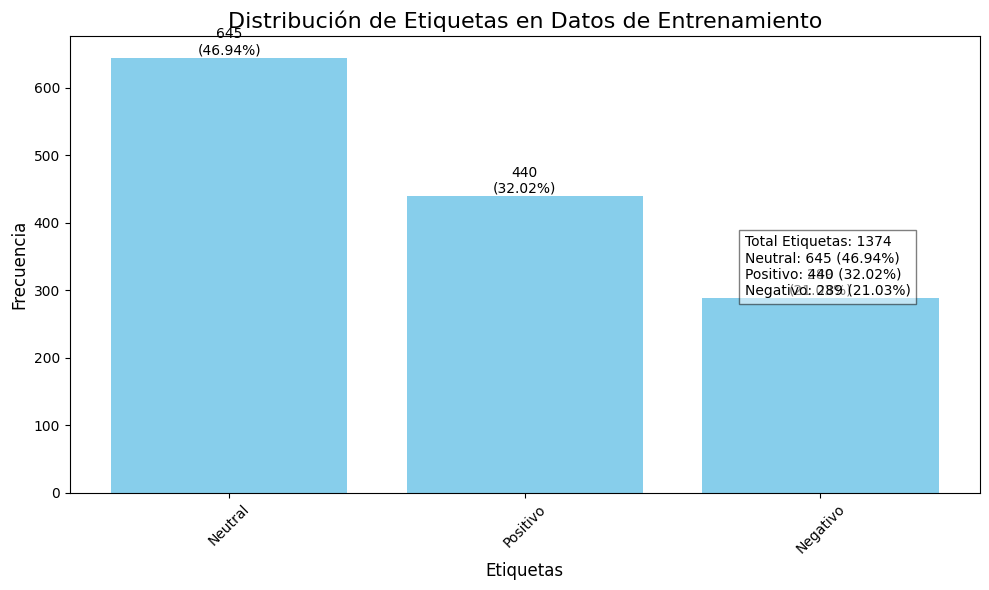

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar frecuencia de etiquetas
label_counts = Counter(labeled_data['ANÁLISIS_FINAL_AJD'])

# Calcular estadísticas adicionales
total_labels = sum(label_counts.values())
proportions = {label: count / total_labels for label, count in label_counts.items()}

# Mostrar las frecuencias en consola
print("Frecuencia de etiquetas:")
for label, count in label_counts.items():
    print(f"{label}: {count} ({proportions[label]:.2%})")

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')

# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    label = f"{height}\n({height / total_labels:.2%})"
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom', fontsize=10)

# Añadir estadísticas al gráfico
total_text = f"Total Etiquetas: {total_labels}\n"
stats_text = total_text + "\n".join([f"{label}: {count} ({proportions[label]:.2%})" for label, count in label_counts.items()])
plt.gcf().text(0.75, 0.5, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Configurar el gráfico
plt.title('Distribución de Etiquetas en Datos de Entrenamiento', fontsize=16)
plt.xlabel('Etiquetas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



**BALANCEO DE CLASES**

Oversampling (Duplicar Clases Minoritarias)

In [33]:
from sklearn.utils import resample
import pandas as pd

# Separar las clases
neutral_data = labeled_data[labeled_data['ANÁLISIS_FINAL_AJD'] == 'Neutral']
positivo_data = labeled_data[labeled_data['ANÁLISIS_FINAL_AJD'] == 'Positivo']
negativo_data = labeled_data[labeled_data['ANÁLISIS_FINAL_AJD'] == 'Negativo']

# Determinar la clase mayoritaria
max_size = len(neutral_data)

# Oversampling de las clases minoritarias
positivo_oversampled = resample(positivo_data, replace=True, n_samples=max_size, random_state=42)
negativo_oversampled = resample(negativo_data, replace=True, n_samples=max_size, random_state=42)

# Combinar las clases balanceadas
oversampled_data = pd.concat([neutral_data, positivo_oversampled, negativo_oversampled])

# Verificar el resultado
print("Distribución después de Oversampling:")
print(oversampled_data['ANÁLISIS_FINAL_AJD'].value_counts())


Distribución después de Oversampling:
ANÁLISIS_FINAL_AJD
Neutral     645
Positivo    645
Negativo    645
Name: count, dtype: int64


Undersampling (Reducir la Clase Mayoritaria)

In [44]:
# Undersampling de todas las clases al tamaño de la clase menor
min_size = len(negativo_data)
neutral_downsampled = resample(neutral_data, replace=False, n_samples=min_size, random_state=42)
positivo_downsampled = resample(positivo_data, replace=False, n_samples=min_size, random_state=42)

# Combinar las clases balanceadas
undersampled_data = pd.concat([neutral_downsampled, positivo_downsampled, negativo_data])

# Verificar el resultado
print("Nueva distribución después de Undersampling:")
print(undersampled_data['ANÁLISIS_FINAL_AJD'].value_counts())


Nueva distribución después de Undersampling:
ANÁLISIS_FINAL_AJD
Neutral     289
Positivo    289
Negativo    289
Name: count, dtype: int64


SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizar el texto (Convertir a representación numérica)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(labeled_data['Normalized_Text'])  # Usamos el texto normalizado
y = labeled_data['ANÁLISIS_FINAL_AJD']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Convertir de vuelta a DataFrame
smote_data = pd.DataFrame(X_smote.toarray(), columns=vectorizer.get_feature_names_out())
smote_data['ANÁLISIS_FINAL_AJD'] = y_smote

# Verificar el resultado
print("Distribución después de SMOTE:")
print(y_smote.value_counts())


Distribución después de SMOTE:
ANÁLISIS_FINAL_AJD
Neutral     645
Positivo    645
Negativo    645
Name: count, dtype: int64


**Comparación de las Técnicas**



In [36]:
print("Distribuciones Comparativas:")
print("Original:")
print(labeled_data['ANÁLISIS_FINAL_AJD'].value_counts())

print("\nOversampling:")
print(oversampled_data['ANÁLISIS_FINAL_AJD'].value_counts())

print("\nUndersampling:")
print(undersampled_data['ANÁLISIS_FINAL_AJD'].value_counts())

print("\nSMOTE:")
print(y_smote.value_counts())


Distribuciones Comparativas:
Original:
ANÁLISIS_FINAL_AJD
Neutral     645
Positivo    440
Negativo    289
Name: count, dtype: int64

Oversampling:
ANÁLISIS_FINAL_AJD
Neutral     645
Positivo    645
Negativo    645
Name: count, dtype: int64

Undersampling:
ANÁLISIS_FINAL_AJD
Neutral     440
Positivo    440
Negativo    289
Name: count, dtype: int64

SMOTE:
ANÁLISIS_FINAL_AJD
Neutral     645
Positivo    645
Negativo    645
Name: count, dtype: int64


Distribuciones Comparativas:
+---+----------+----------+--------------+---------------+-------+
|   | Etiqueta | Original | Oversampling | Undersampling | SMOTE |
+---+----------+----------+--------------+---------------+-------+
| 0 | Neutral  |   645    |     645      |      440      |  645  |
| 1 | Positivo |   440    |     645      |      440      |  645  |
| 2 | Negativo |   289    |     645      |      289      |  645  |
+---+----------+----------+--------------+---------------+-------+


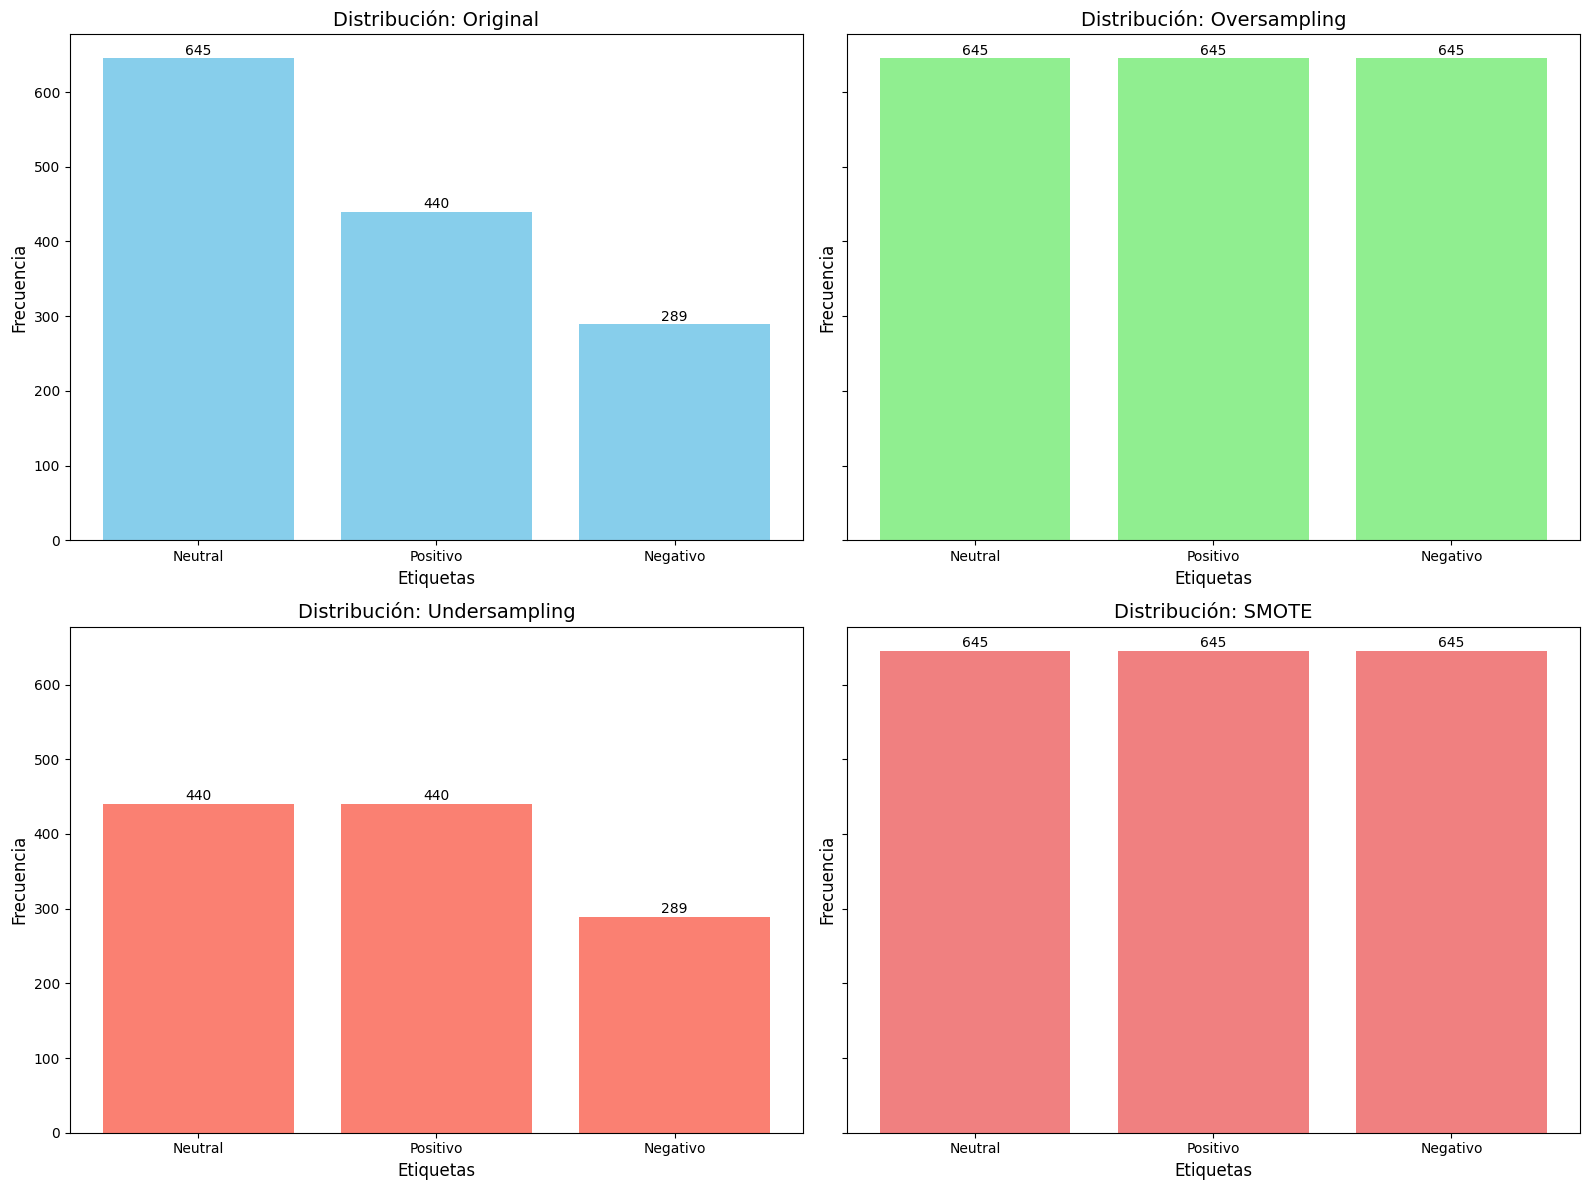

In [38]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Crear un DataFrame para comparar las distribuciones
distribution_data = {
    'Etiqueta': labeled_data['ANÁLISIS_FINAL_AJD'].unique(),
    'Original': labeled_data['ANÁLISIS_FINAL_AJD'].value_counts().values,
    'Oversampling': oversampled_data['ANÁLISIS_FINAL_AJD'].value_counts().values,
    'Undersampling': undersampled_data['ANÁLISIS_FINAL_AJD'].value_counts().values,
    'SMOTE': y_smote.value_counts().values
}

# Crear el DataFrame
distribution_df = pd.DataFrame(distribution_data)

# Mostrar la tabla en formato tabular
print("Distribuciones Comparativas:")
print(tabulate(distribution_df, headers='keys', tablefmt='pretty'))

# Generar gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
axes = axes.flatten()

# Colores
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral']

# Graficar cada distribución
for i, column in enumerate(distribution_df.columns[1:]):
    axes[i].bar(distribution_df['Etiqueta'], distribution_df[column], color=colors[i])
    axes[i].set_title(f"Distribución: {column}", fontsize=14)
    axes[i].set_xlabel("Etiquetas", fontsize=12)
    axes[i].set_ylabel("Frecuencia", fontsize=12)
    for x, y in zip(distribution_df['Etiqueta'], distribution_df[column]):
        axes[i].text(x, y + 5, f"{y}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


**ENTRENAMIENTO Y EVALUACIÓN**

In [39]:
print("Columnas en oversampled_data:", oversampled_data.columns)
print("Columnas en undersampled_data:", undersampled_data.columns)
print("Columnas en smote_data:", smote_data.columns)


Columnas en oversampled_data: Index(['Folder', 'Filename', 'Speaker', 'Text', 'Text_Length',
       'Normalized_Text', 'Lemmatized_Text', 'Stemmed_Text',
       'Stopword_Removed_Text', 'Stopword_Removed_Lemmatized_Text',
       'Stopword_Removed_Stemmed_Text', 'Normalized_Text_Length',
       'Lemmatized_Text_Length', 'Stemmed_Text_Length',
       'Stopword_Removed_Text_Length',
       'Stopword_Removed_Lemmatized_Text_Length',
       'Stopword_Removed_Stemmed_Text_Length', 'ANÁLISIS_FINAL_AJD'],
      dtype='object')
Columnas en undersampled_data: Index(['Folder', 'Filename', 'Speaker', 'Text', 'Text_Length',
       'Normalized_Text', 'Lemmatized_Text', 'Stemmed_Text',
       'Stopword_Removed_Text', 'Stopword_Removed_Lemmatized_Text',
       'Stopword_Removed_Stemmed_Text', 'Normalized_Text_Length',
       'Lemmatized_Text_Length', 'Stemmed_Text_Length',
       'Stopword_Removed_Text_Length',
       'Stopword_Removed_Lemmatized_Text_Length',
       'Stopword_Removed_Stemmed_Text_Len

In [46]:
from sklearn.metrics import classification_report
import torch
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset

# Función para entrenar y evaluar el modelo
def train_and_evaluate_model(data, label_mapping, model_name='dccuchile/bert-base-spanish-wwm-cased', epochs=3, batch_size=16):
    # Preparar datos
    texts = data['Normalized_Text'].tolist()
    labels = data['ANÁLISIS_FINAL_AJD'].map(label_mapping).values
    
    # Tokenización con padding uniforme
    encodings = tokenizer(
        texts,
        truncation=True,  # Truncar secuencias largas
        padding="max_length",  # Aplicar padding uniforme
        max_length=128,  # Longitud máxima para las secuencias
        return_tensors='pt'
    )
    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    labels = torch.tensor(labels)
    
    # Crear dataset
    dataset = TensorDataset(input_ids, attention_mask, labels)
    
    # Dividir en entrenamiento y validación
    split = int(0.8 * len(dataset))
    train_dataset = TensorDataset(
        input_ids[:split],
        attention_mask[:split],
        labels[:split]
    )
    val_dataset = TensorDataset(
        input_ids[split:],
        attention_mask[split:],
        labels[split:]
    )
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
    
    # Configurar el modelo
    model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(label_mapping))
    optimizer = AdamW(model.parameters(), lr=5e-5)
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)
    
    # Entrenamiento
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_dataloader:
            b_input_ids, b_attention_mask, b_labels = (t.to(device) for t in batch)
            optimizer.zero_grad()
            outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {total_loss / len(train_dataloader):.4f}")
    
    # Evaluación
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            b_input_ids, b_attention_mask, b_labels = (t.to(device) for t in batch)
            outputs = model(b_input_ids, attention_mask=b_attention_mask)
            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(b_labels.cpu().numpy())
    
    # Métricas
    report = classification_report(true_labels, predictions, target_names=list(label_mapping.keys()))
    print(report)
    return report

# Mapear etiquetas a índices
label_mapping = {label: idx for idx, label in enumerate(labeled_data['ANÁLISIS_FINAL_AJD'].unique())}

# Preparar SMOTE data
smote_texts = [' '.join([word for word in smote_data.columns[:-1] if smote_data.loc[i, word] > 0])
               for i in range(smote_data.shape[0])]
smote_data_prepared = pd.DataFrame({
    'Normalized_Text': smote_texts,
    'ANÁLISIS_FINAL_AJD': smote_data['ANÁLISIS_FINAL_AJD']
})

# Entrenamiento con Oversampling
print("\nEvaluación con Oversampling:")
oversampling_report = train_and_evaluate_model(oversampled_data, label_mapping, epochs=3, batch_size=8)

# Entrenamiento con Undersampling
print("\nEvaluación con Undersampling:")
undersampling_report = train_and_evaluate_model(undersampled_data, label_mapping, epochs=3, batch_size=8)

# Entrenamiento con SMOTE
print("\nEvaluación con SMOTE:")
smote_report = train_and_evaluate_model(smote_data_prepared, label_mapping, epochs=3, batch_size=8)




Evaluación con Oversampling:


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3 - Loss: 1.0244
Epoch 2/3 - Loss: 0.8470
Epoch 3/3 - Loss: 0.6408


c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         0
    Positivo       0.00      0.00      0.00         0
    Negativo       1.00      0.35      0.52       387

    accuracy                           0.35       387
   macro avg       0.33      0.12      0.17       387
weighted avg       1.00      0.35      0.52       387


Evaluación con Undersampling:


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3 - Loss: 1.0665
Epoch 2/3 - Loss: 1.0463
Epoch 3/3 - Loss: 1.0238


c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00       0.0
    Positivo       0.00      0.00      0.00       0.0
    Negativo       0.00      0.00      0.00     174.0

    accuracy                           0.00     174.0
   macro avg       0.00      0.00      0.00     174.0
weighted avg       0.00      0.00      0.00     174.0


Evaluación con SMOTE:


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3 - Loss: 1.1121
Epoch 2/3 - Loss: 1.0985
Epoch 3/3 - Loss: 1.1000
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00       0.0
    Positivo       0.00      0.00      0.00     205.0
    Negativo       0.00      0.00      0.00     182.0

    accuracy                           0.00     387.0
   macro avg       0.00      0.00      0.00     387.0
weighted avg       0.00      0.00      0.00     387.0



c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jartp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [43]:
print(oversampled_data['ANÁLISIS_FINAL_AJD'].value_counts())
print(undersampled_data['ANÁLISIS_FINAL_AJD'].value_counts())
print(smote_data_prepared['ANÁLISIS_FINAL_AJD'].value_counts())


ANÁLISIS_FINAL_AJD
Neutral     645
Positivo    645
Negativo    645
Name: count, dtype: int64
ANÁLISIS_FINAL_AJD
Neutral     440
Positivo    440
Negativo    289
Name: count, dtype: int64
ANÁLISIS_FINAL_AJD
Neutral     645
Positivo    645
Negativo    645
Name: count, dtype: int64


In [48]:
from collections import Counter

# Extraer etiquetas de validación
val_labels = [label.item() for _, _, label in val_dataset]

# Contar las clases en el conjunto de validación
class_distribution = Counter(val_labels)
print("Distribución de clases en validación:", class_distribution)



Distribución de clases en validación: Counter({0: 129, 1: 88, 2: 58})
